In [8]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import keras
from tqdm import tqdm
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Set Path of the image

In [57]:
#choose path to the image 'data/1.png' or 'data/2.png' 
input_img=input("Enter image name: ")
img = Image.open(input_img)


Enter image name: 2.png


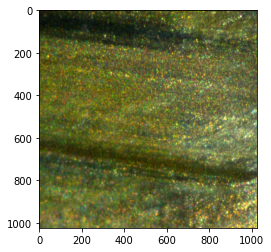

In [58]:
plt.imshow(img)

In [49]:
print("""which model are you going to use?
press 1 for Unet
2 for ResUnet
3 for InceptionUnet""")
a=input()

which model are you going to use?
press 1 for Unet
2 for ResUnet
3 for InceptionUnet
3


In [50]:
if (a==1):
  model=keras.models.load_model('UNET.h5')
elif (a==2):
  model= keras.models.load_model('RESUNET.h5')
elif (a==3):
  model=keras.models.load_model('INCEPTIONUNET.h5')

In [46]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
path='data'
X_predict = np.zeros((len(os.listdir(path)), IMG_HEIGHT, IMG_WIDTH,IMG_CHANNELS),dtype=np.uint8)
print('creating prediction data')
l=0
for name in tqdm(os.listdir(path)):
    newpath = os.path.join(path,name)
    img=cv2.imread(newpath)
    img=cv2.resize(img,(IMG_WIDTH,IMG_HEIGHT))
    X_predict[l]=img
    l+=1



100%|██████████| 2/2 [00:00<00:00, 47.46it/s]

creating prediction data


In [51]:
pred_train=model.predict(X_predict[:int(X_predict.shape[0]*0.9)],verbose=1)

pred_train_t = (pred_train>0.5).astype(np.uint8)

1/1 [==============================] - 0s 16ms/step


In [ ]:
if (input_image=="data/1.png"):
  i=0;
elif (input_image=="data/2.png"):
  i=1;

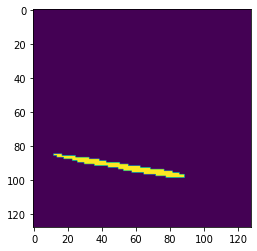

In [52]:
plt.imshow(X_predict[i])

plt.imshow(np.reshape(pred_train_t[i],(IMG_HEIGHT,IMG_WIDTH)))